### Analysis of the sentiment of the latest news articles on Bitcoin and Ethereum using sentiment analysis, natural language processing and named entity recognition.

## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/moritzrichter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# Load environment variables and retrieve the News API key
load_dotenv()
api_key = os.getenv("0ab3f4590ef64cd7ad42831b4da7c47e")

In [3]:
from newsapi import NewsApiClient

# Make sure to replace 'your_api_key_here' with your actual News API key
api_key = '0ab3f4590ef64cd7ad42831b4da7c47e'
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
)

# Show the total number of news
bitcoin_news["totalResults"]

13892

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
)

# Show the total number of news
ethereum_news["totalResults"]

6649

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['description'])
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"]
      
        bitcoin_sentiment.append({
            "Title": title,
            "Description": description,
            "Text": text,
            "Date": date,
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create dataframe
btc_df = pd.DataFrame(bitcoin_sentiment)

# Preview dataframe
btc_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral
0,The Science of Crypto Forensics Survives a Cou...,A jury convicted Roman Sterlingov of money lau...,"On March 12, Russian-Swedish national Roman St...",2024-03-27T11:00:00Z,0.1280,0.053,0.000,0.947
1,Woman found with £2bn in Bitcoin convicted,"Jian Wen, 42, from north London, was involved ...",A former takeaway worker found with Bitcoin wo...,2024-03-20T17:50:49Z,0.4939,0.231,0.000,0.769
2,The Feds Are Reportedly Investigating Ethereum...,The U.S. Securities and Exchange Commission (S...,The U.S. Securities and Exchange Commission (S...,2024-03-20T18:15:00Z,0.4779,0.173,0.083,0.744
3,Why did the Bitcoin price drop?,"Despite reaching record highs of almost $74,00...","Despite reaching record highs of almost $74,00...",2024-03-15T12:38:50Z,-0.6312,0.000,0.143,0.857
4,World’s top pension fund eyes Bitcoin,Japan’s Government Pension Investment Fund (GP...,Japan’s Government Pension Investment Fund (GP...,2024-03-19T14:13:51Z,0.3818,0.098,0.000,0.902


In [7]:
type(btc_df['Text'])

pandas.core.series.Series

In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['description'])
        title = article["title"]
        description = article["description"]
        text = article["content"]
        date = article["publishedAt"]
      
        ethereum_sentiment.append({
            "Title": title,
            "Description": description,
            "Text": text,
            "Date": date,
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create dataframe
eth_df = pd.DataFrame(ethereum_sentiment)

# Preview dataframe
eth_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral
0,The Feds Are Reportedly Investigating Ethereum...,The U.S. Securities and Exchange Commission (S...,The U.S. Securities and Exchange Commission (S...,2024-03-20T18:15:00Z,0.4779,0.173,0.083,0.744
1,Ex Ethereum advisor Steven Nerayoff criticizes...,Early Ethereum (ETH) advisor Steven Nerayoff h...,Early Ethereum (ETH) advisor Steven Nerayoff h...,2024-03-22T12:28:27Z,-0.4019,0.000,0.096,0.904
2,Solana supplants Ethereum as top place on DEX ...,Solana has surpassed Ethereum to get to the nu...,Solana has surpassed Ethereum to get to the nu...,2024-03-21T14:04:33Z,0.4404,0.112,0.000,0.888
3,SEC opens comment period for Ethereum spot ETF...,The U.S. Securities and Exchange Commission (S...,The U.S. Securities and Exchange Commission (S...,2024-04-04T15:11:42Z,0.2960,0.056,0.000,0.944
4,VanEck CEO skeptical about spot Ethereum ETF a...,VanEck CEO Jan van Eck has voiced his skeptici...,VanEck CEO Jan van Eck has voiced his skeptici...,2024-04-10T17:53:10Z,0.1531,0.127,0.135,0.738


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.087573,0.076636,0.059929,0.863424
std,0.485318,0.076107,0.090157,0.104749
min,-0.906200,0.000000,0.000000,0.478000
25%,-0.184000,0.000000,0.000000,0.807500
50%,0.051600,0.059000,0.000000,0.873000
75%,0.493900,0.127000,0.105000,0.945500
max,0.862500,0.322000,0.471000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.204791,0.091220,0.036820,0.871980
std,0.441001,0.091334,0.058515,0.103248
min,-0.862500,0.000000,0.000000,0.524000
25%,0.000000,0.000000,0.000000,0.795500
50%,0.206300,0.068000,0.000000,0.888000
75%,0.546075,0.142750,0.061250,0.952500
max,0.900100,0.476000,0.236000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum had the highest mean compound score. Bitcoin had the highest max compound score.

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, I will use NLTK and Python to tokenize the text for each coin. 
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
import nltk

# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moritzrichter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem]
    
    return tokens

In [15]:
import nltk

# Download the wordnet resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/moritzrichter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Create a new tokens column for Bitcoin
btc_df['Tokens'] = btc_df['Text'].apply(tokenizer)
btc_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,The Science of Crypto Forensics Survives a Cou...,A jury convicted Roman Sterlingov of money lau...,"On March 12, Russian-Swedish national Roman St...",2024-03-27T11:00:00Z,0.1280,0.053,0.000,0.947,"[on, march, russianswedish, national, roman, s..."
1,Woman found with £2bn in Bitcoin convicted,"Jian Wen, 42, from north London, was involved ...",A former takeaway worker found with Bitcoin wo...,2024-03-20T17:50:49Z,0.4939,0.231,0.000,0.769,"[a, former, takeaway, worker, found, with, bit..."
2,The Feds Are Reportedly Investigating Ethereum...,The U.S. Securities and Exchange Commission (S...,The U.S. Securities and Exchange Commission (S...,2024-03-20T18:15:00Z,0.4779,0.173,0.083,0.744,"[the, us, securities, and, exchange, commissio..."
3,Why did the Bitcoin price drop?,"Despite reaching record highs of almost $74,00...","Despite reaching record highs of almost $74,00...",2024-03-15T12:38:50Z,-0.6312,0.000,0.143,0.857,"[despite, reaching, record, high, of, almost, ..."
4,World’s top pension fund eyes Bitcoin,Japan’s Government Pension Investment Fund (GP...,Japan’s Government Pension Investment Fund (GP...,2024-03-19T14:13:51Z,0.3818,0.098,0.000,0.902,"[japans, government, pension, investment, fund..."


In [17]:
# Create a new tokens column for Ethereum
eth_df['Tokens'] = eth_df['Text'].apply(tokenizer)
eth_df.head()

,Title,Description,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,The Feds Are Reportedly Investigating Ethereum...,The U.S. Securities and Exchange Commission (S...,The U.S. Securities and Exchange Commission (S...,2024-03-20T18:15:00Z,0.4779,0.173,0.083,0.744,"[the, us, securities, and, exchange, commissio..."
1,Ex Ethereum advisor Steven Nerayoff criticizes...,Early Ethereum (ETH) advisor Steven Nerayoff h...,Early Ethereum (ETH) advisor Steven Nerayoff h...,2024-03-22T12:28:27Z,-0.4019,0.000,0.096,0.904,"[early, ethereum, eth, advisor, steven, nerayo..."
2,Solana supplants Ethereum as top place on DEX ...,Solana has surpassed Ethereum to get to the nu...,Solana has surpassed Ethereum to get to the nu...,2024-03-21T14:04:33Z,0.4404,0.112,0.000,0.888,"[solana, ha, surpassed, ethereum, to, get, to,..."
3,SEC opens comment period for Ethereum spot ETF...,The U.S. Securities and Exchange Commission (S...,The U.S. Securities and Exchange Commission (S...,2024-04-04T15:11:42Z,0.2960,0.056,0.000,0.944,"[the, us, securities, and, exchange, commissio..."
4,VanEck CEO skeptical about spot Ethereum ETF a...,VanEck CEO Jan van Eck has voiced his skeptici...,VanEck CEO Jan van Eck has voiced his skeptici...,2024-04-10T17:53:10Z,0.1531,0.127,0.135,0.738,"[vaneck, ceo, jan, van, eck, ha, voiced, his, ..."


---

### NGrams and Frequency Analysis

In this section we look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [19]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('on', 'march'): 1,
 ('march', 'russianswedish'): 1,
 ('russianswedish', 'national'): 1,
 ('national', 'roman'): 1,
 ('roman', 'sterlingov'): 1,
 ('sterlingov', 'wa'): 1,
 ('wa', 'found'): 1,
 ('found', 'guilty'): 1,
 ('guilty', 'of'): 1,
 ('of', 'money'): 1}

In [20]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('the', 'us'): 1,
 ('us', 'securities'): 1,
 ('securities', 'and'): 1,
 ('and', 'exchange'): 1,
 ('exchange', 'commission'): 1,
 ('commission', 'sec'): 1,
 ('sec', 'is'): 1,
 ('is', 'investigating'): 1,
 ('investigating', 'the'): 1,
 ('the', 'ethereum'): 1}

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('the', 116),
 ('char', 95),
 ('a', 91),
 ('of', 59),
 ('bitcoin', 53),
 ('in', 51),
 ('to', 49),
 ('and', 46),
 ('de', 38),
 ('on', 34)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('the', 179),
 ('a', 118),
 ('char', 97),
 ('ethereum', 70),
 ('of', 62),
 ('and', 56),
 ('in', 54),
 ('on', 52),
 ('to', 44),
 ('it', 39)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_3910/2772510350.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


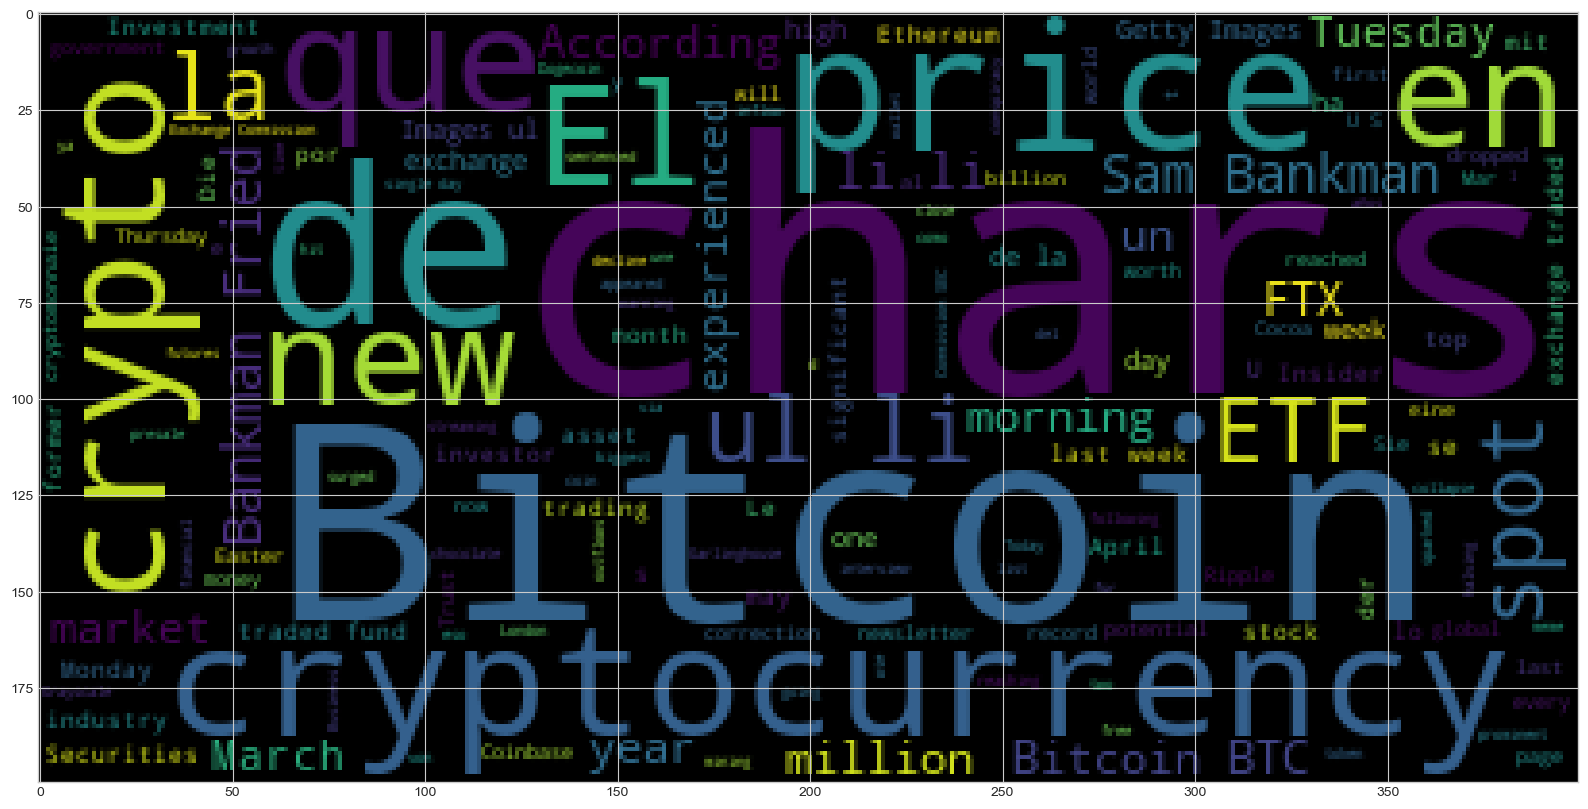

In [26]:
# Generate the Bitcoin word cloud
bitcoin_text = ' '.join(btc_df.Text)
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

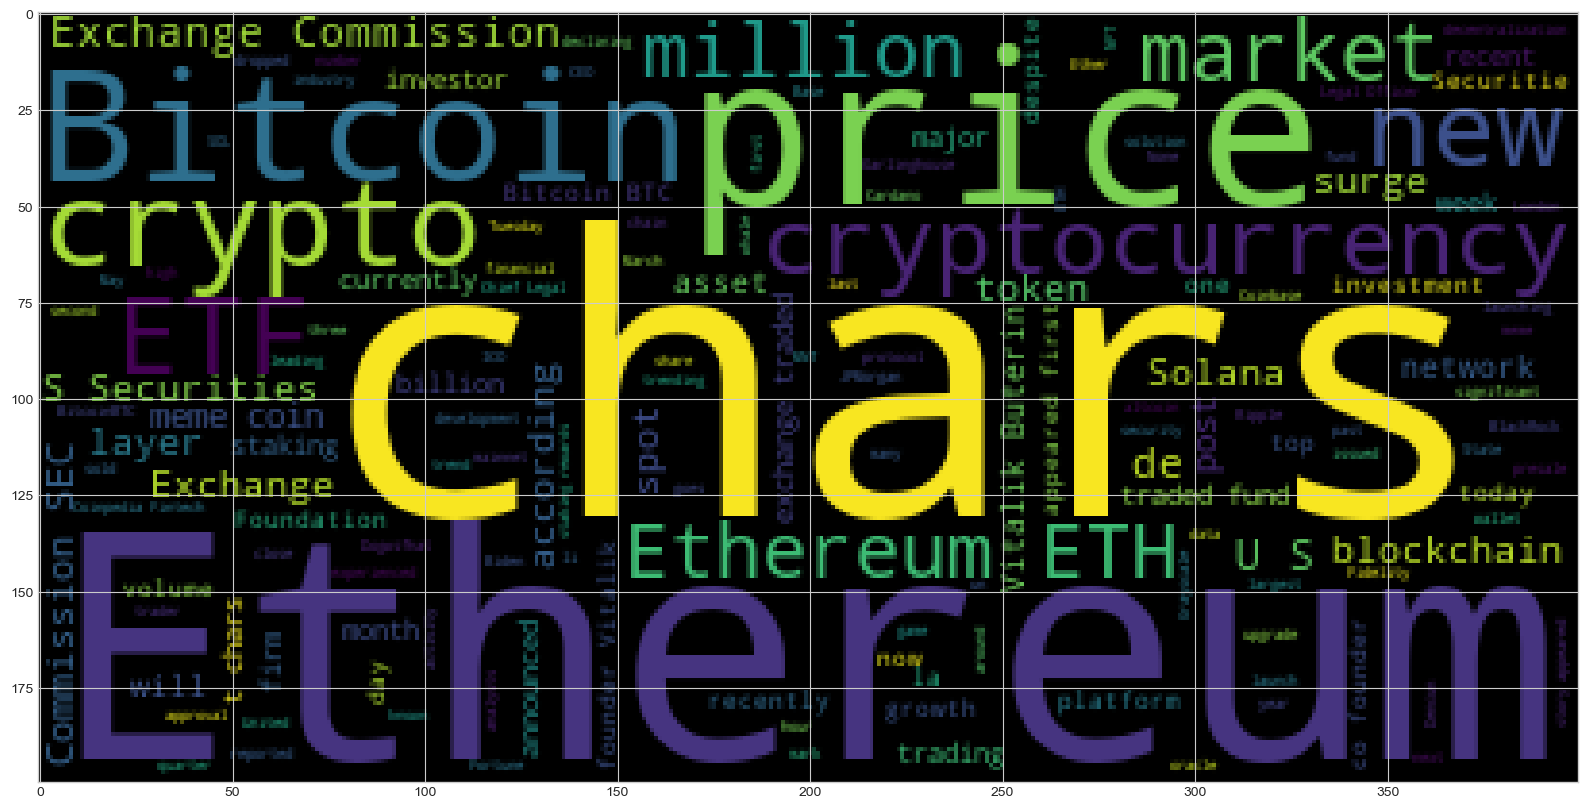

In [27]:
# Generate the Ethereum word cloud
ethereum_text = ' '.join(eth_df.Text)
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [29]:
import spacy
from spacy import displacy

In [30]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 28.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp311-cp311-macosx_11_0_arm64.whl
  Using cached thinc-8.0.17-cp311-cp311-macosx_11_0_arm64.whl
  Using cached wasabi-0.10.1-py3-none-any.whl.metadata (28 kB)
  Using cached typer-0.3.2-py3-none-any.whl.metadata (12 kB)
  Using cached pathy-0.11.0-py3-none-any.whl.metadata (16 kB)
  Using cached pydantic-1.8.2-py3-none-any.whl.metadata (103 kB)
  Using cached pathlib_abc-0.1.1-py3-none-any.whl.metadata (18 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl.metadata (2.9 kB)
Using cached pathy-0.11.0-py3-none-any.whl (47 kB)
Using cached pathlib_abc-0.1.1-py3-none-any.whl (23 kB)
Using cached pydantic-1.8.2-py3-none-any.whl (126 kB)
Using cached typer-0.3.2-py3-none-any.whl (21 kB)
Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Created wheel for en-core-web-sm: filename

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  


---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(btc_df.Text)

In [33]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [34]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [35]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

March 12 DATE
Russian-Swedish NORP
Roman Sterlingov PERSON
Washington, GPE
DC GPE
Bitcoin Fog PERSON
Bitcoin PERSON
more than £2bn MONEY
Southwark Crown Court ORG
Jian Wen PERSON
42 DATE
Hendon GPE
London GPE
The U.S. Securities and Exchange Commission ORG
SEC ORG
the Ethereum Foundation ORG
Fortune Wednesday WORK_OF_ART
almost $74,000 MONEY
Thursday DATE
March 14 DATE
Bitcoin (BTC ORG
9% PERCENT
early on DATE
Friday (March 15 DATE
66 MONEY
885 CARDINAL
Bitcoin (BTC WORK_OF_ART
Mar. 19 DATE
Monday DATE
Bitcoin PERSON
$15.4 million MONEY
five consecutive days DATE
8,900 MONEY
BitMEX ORG
60,000 MONEY
a late Monday DATE
Bitcoin PERSON
this year DATE
Brad Garlinghouse PERSON
CNBC ORG
Garlinghouse ORG
The Grayscale Bitcoin Trust ORG
Bitcoin PERSON
U ORG
the fourth financial quarter of 2023 DATE
163% PERCENT
the start of October last year DATE
Bitcoin PERSON
the month of March DATE
61,157 MONEY
Bitcoin (BTC ORG
Tuesday DATE
Mar 19 DATE
FTX ORG
November 2022 DATE
The Grayscale Bitcoin Trust O

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(eth_df.Text)

In [37]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [38]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [39]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

The U.S. Securities and Exchange Commission ORG
SEC ORG
the Ethereum Foundation ORG
Fortune Wednesday WORK_OF_ART
ETH ORG
Steven Nerayoff PERSON
the U.S. Securities and Exchange Commission ORG
SEC ORG
Nerayoff PERSON
Solana PERSON
one CARDINAL
Fortune on March 21 WORK_OF_ART
The U.S. Securities and Exchange Commission ORG
SEC ORG
three-week DATE
three CARDINAL
ETH ORG
Grayscale Investments ORG
VanEck ORG
Jan van Eck PERSON
ETH ORG
the U.S. Securities and Exchange Commission ORG
SEC ORG
ETH ORG
one million CARDINAL
32 million CARDINAL
This 32 million CARDINAL
around $114 billion MONEY
Learn ORG
The U.S. Securities and Exchange Commission ORG
SEC ORG
New York GPE
close to $2 billion MONEY
Ripple Labs ORG
Stuart Alderoty PERSON
Ripp PERSON
U.S. GPE
30,175 CARDINAL
Bitcoin (BTC WORK_OF_ART
Tuesday DATE
morning TIME
Bitcoin ORG
around $65,000 MONEY
Goldman Sachs ORG
Bitcoin PERSON
Base PERSON
ETH ORG
2 CARDINAL
Base PERSON
Optimism NORP
last week DATE
Bitcoin and Ethereum ORG
1.7% and 4% PE

---